In [2]:
import pyro
from pyro import poutine
import pyro.distributions as dist
import torch

outer_plate=pyro.plate(5)

def model(xinds):
    scale_tensor=torch.bincount(xinds, minlength=5).view(-1,1,1,)+1e-10
    with poutine.scale(scale=scale_tensor):
        with outer_plate:
            with pyro.plate(6):
                with pyro.plate(1000):
                    pyro.sample('param_with_cost_sample',dist.Laplace(torch.zeros(5,6,1000),torch.ones(5,6,1000)))


def guide(xinds):
    scale_tensor=torch.bincount(xinds, minlength=5).view(-1,1,1,)+1e-10
    pwc=pyro.param('param_with_cost',torch.ones(5,6,1000))
    with poutine.scale(scale=scale_tensor):
        with outer_plate:
            with pyro.plate(6):
                with pyro.plate(1000):
                    pyro.sample('param_with_cost_sample',dist.Delta(pwc))

pyro.clear_param_store()
optim = pyro.optim.Adam({"lr": 0.1})
elbo = pyro.infer.Trace_ELBO(max_plate_nesting=3)
svi = pyro.infer.SVI(model, guide, optim, loss=elbo)
for i in range(10):
    xinds=torch.randint(0, 4, (300,))
    loss = svi.step(xinds)
    print(loss)


3047664.5
2867665.75
2688192.0
2508746.25
2330023.75
2151132.0
1972134.0
1793338.0
1614971.125
1436625.25


/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/utils/miniconda3/envs/pyro/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
reshape=[]
torch.rand(5,6)[indexing_none_list(5)].shape

torch.Size([1, 1, 1, 1, 1, 5, 6])

In [69]:
a=torch.rand(32,12)
b=torch.rand(32,53)
a=a/a.sum(1,keepdim=True)
#a=a/a.sum(0,keepdim=True)
b=b/b.sum(1,keepdim=True)
#b=b/b.sum(0,keepdim=True)

c=torch.einsum('bi,bj->ij',a,b)

In [70]:
a.sum(0)

tensor([2.4879, 2.4508, 3.1876, 2.5235, 2.5659, 2.5986, 2.9209, 2.5621, 2.8103,
        3.0168, 2.2733, 2.6024])

In [71]:
b.sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [72]:
c.sum(0)

tensor([0.6927, 0.7005, 0.5684, 0.4993, 0.6699, 0.5772, 0.6413, 0.6483, 0.5704,
        0.6996, 0.7476, 0.6680, 0.6718, 0.6744, 0.4849, 0.6031, 0.6858, 0.5733,
        0.4940, 0.5907, 0.5399, 0.5576, 0.6254, 0.5730, 0.6190, 0.5008, 0.6357,
        0.5978, 0.5397, 0.5728, 0.5799, 0.5140, 0.5414, 0.5751, 0.5542, 0.5984,
        0.6059, 0.5860, 0.4915, 0.5808, 0.6415, 0.7183, 0.5690, 0.6637, 0.6801,
        0.6213, 0.6547, 0.6189, 0.4894, 0.6280, 0.5285, 0.6569, 0.6796])

In [73]:
c.sum(1)

tensor([2.4879, 2.4508, 3.1876, 2.5235, 2.5659, 2.5986, 2.9209, 2.5621, 2.8103,
        3.0168, 2.2733, 2.6024])

In [74]:
c.sum()

tensor(32.)

In [61]:
import numpy as np
np.prod([a.shape[-1],b.shape[-1]])

636

<Axes: >

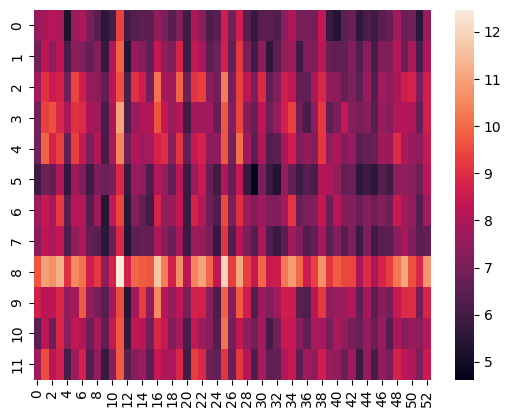

In [21]:
import seaborn
seaborn.heatmap(torch.einsum('bi,bj->ij',a,b))